# Sale Analysis - Activity

Customer segmentation is the activity of dividing a broad consumer or business market, normally consisting of existing and potential customers, into sub-groups of consumers (known as segments) based on some type of shared characteristics. The overall aim of segmentation is to identify high yield segments – that is, those segments that are likely to be the most profitable or that have growth potential – so that these can be selected for special attention

Data link : https://www.kaggle.com/kyanyoga/sample-sales-data

## Part 1: A general look at the data

In [200]:
# Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the csv file into a Pandas Dataframe
df = pd.read_csv(r"C:\Users\Oz\Desktop\DATA\PYTHON\Sales Data Analysis\Dataset\sales_data_sample.csv", 
                 encoding = 'unicode_escape')
pd.set_option('display.max_columns', None)
df.head(5)

#I had to prefix the string with r (to produce a raw string)

# MSRP = manufacturer's suggested retail price

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## Part 2: Data preparation

In [201]:
#Removing the variables which don't add significant value fot the analysis.
to_drop = ['ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE', 'PHONE']
df = df.drop(to_drop, axis=1)

#Checking for null values and inconsistent data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 20 columns):
ORDERNUMBER         2823 non-null int64
QUANTITYORDERED     2823 non-null int64
PRICEEACH           2823 non-null float64
ORDERLINENUMBER     2823 non-null int64
SALES               2823 non-null float64
ORDERDATE           2823 non-null object
STATUS              2823 non-null object
QTR_ID              2823 non-null int64
MONTH_ID            2823 non-null int64
YEAR_ID             2823 non-null int64
PRODUCTLINE         2823 non-null object
MSRP                2823 non-null int64
PRODUCTCODE         2823 non-null object
CUSTOMERNAME        2823 non-null object
CITY                2823 non-null object
COUNTRY             2823 non-null object
TERRITORY           1749 non-null object
CONTACTLASTNAME     2823 non-null object
CONTACTFIRSTNAME    2823 non-null object
DEALSIZE            2823 non-null object
dtypes: float64(2), int64(7), object(11)
memory usage: 441.2+ KB


TERRITORY variable will not be used, it doesn't have a significant effect on the analysis.
Moreover we change the data type of variable 'ORDERDATE' from object to datetime

In [58]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [59]:
#Summary stats of Quantitative variables
quant_vars = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']
df[quant_vars].describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


There is no negative values. There is no problemn with the data on the first level : means and standart deviation seem coherent.

## Part 3: Exploring the variables¶

Text(0.5, 1.0, 'Quantity ordered Distribution')

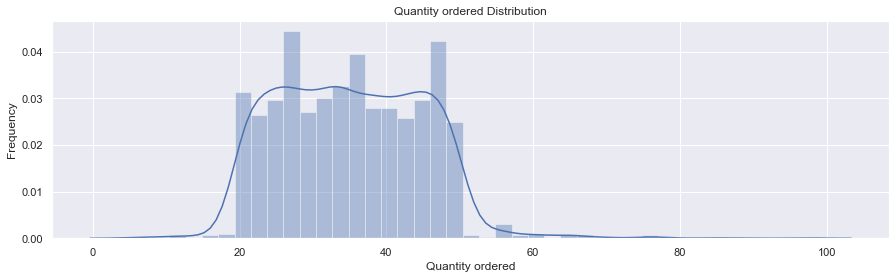

In [60]:
sns.distplot(df['QUANTITYORDERED'], kde=True);
sns.set(rc={'figure.figsize':(15,4)})
plt.ylabel('Frequency')
plt.xlabel('Quantity ordered')
plt.title("Quantity ordered Distribution")

This plot is the histogram of a the variable "Quantity ordered" whereas the line estimates the distribution from which the variable is derived.

From the distribution plot of quantity, we can infer that the orders are bulk orders. Majority of the order's quantity are between 20-40 units. 

Text(0.5, 1.0, 'Price Distribution')

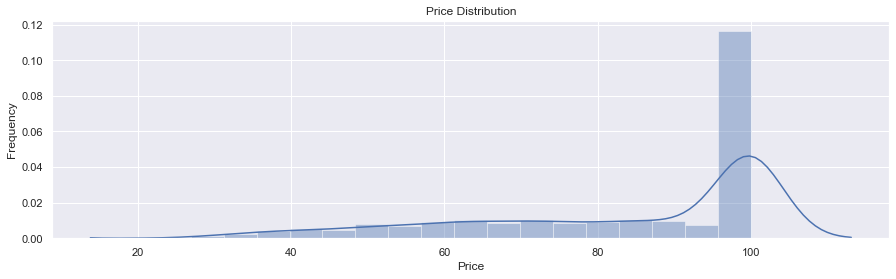

In [61]:
sns.distplot(df['PRICEEACH'], kde=True);
sns.set(rc={'figure.figsize':(15,4)})
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title("Price Distribution")

The price distribution is overall homogeneous. But it is observed a highest price appears with the highest frequency.

Text(0.5, 1.0, 'Sales Distribution')

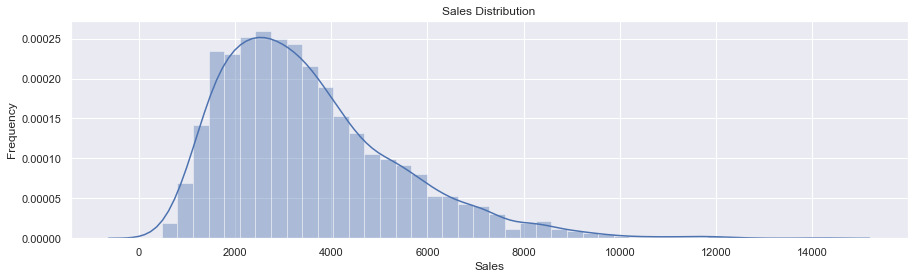

In [62]:
sns.distplot(df['SALES'], kde=True);
sns.set(rc={'figure.figsize':(15,4)})
plt.ylabel('Frequency')
plt.xlabel('Sales')
plt.title("Sales Distribution")

In [63]:
#Analyzing the STATUS variable

df['STATUS'].value_counts(normalize=True)

Shipped       0.927028
Cancelled     0.021254
Resolved      0.016649
On Hold       0.015586
In Process    0.014524
Disputed      0.004959
Name: STATUS, dtype: float64

In [64]:
df['DEALSIZE'].value_counts(normalize=True)


Medium    0.490259
Small     0.454127
Large     0.055615
Name: DEALSIZE, dtype: float64

Text(0.5, 1.0, 'Dealsize Distribution')

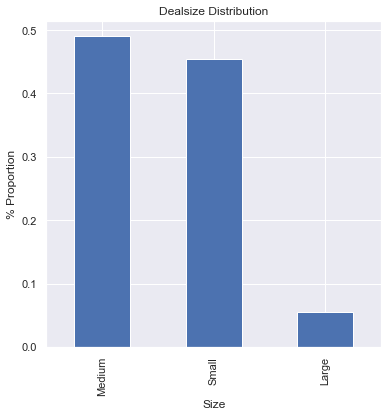

In [65]:
fig= plt.figure(figsize=(6,6))
df['DEALSIZE'].value_counts(normalize=True).plot.bar() 
plt.ylabel('% Proportion')
plt.xlabel('Size')
plt.title("Dealsize Distribution")

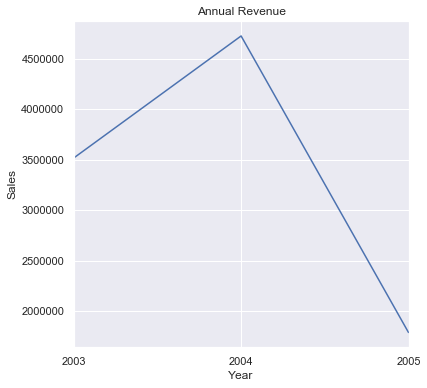

In [66]:
#Analyzing KPIs

#Annual Revenue

Years = [2003,2004,2005]
fig= plt.figure(figsize=(6,6))
df.groupby(['YEAR_ID']).sum()['SALES'].plot()
plt.xticks(Years)
plt.ylabel('Sales')
plt.xlabel('Year')
plt.title("Annual Revenue")
plt.show()

In [67]:
df.groupby(['YEAR_ID']).sum()['SALES']

YEAR_ID
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64

In [68]:
df['YEAR_ID'].value_counts()


2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64

The sales in 2005 are very low compared to the previous years. It means we don't have the complete data for 2005, so analyzing the Annual Revenue can be misleading. Instead, we can analyze Monthy Revenue.

In [69]:
#Monthly Revenue

Sales=df.pivot_table('SALES', index='MONTH_ID', columns='YEAR_ID', aggfunc="sum")
Sales

YEAR_ID,2003,2004,2005
MONTH_ID,,,
1,129753.60,316577.42,339543.42
2,140836.19,311419.53,358186.18
3,174504.90,205733.73,374262.76
4,201609.55,206148.12,261633.29
5,192673.11,273438.39,457861.06
6,168082.56,286674.22,NaN
7,187731.88,327144.09,NaN
8,197809.30,461501.27,NaN
9,263973.36,320750.91,NaN


Text(0.5, 1.0, 'Annual Revenue')

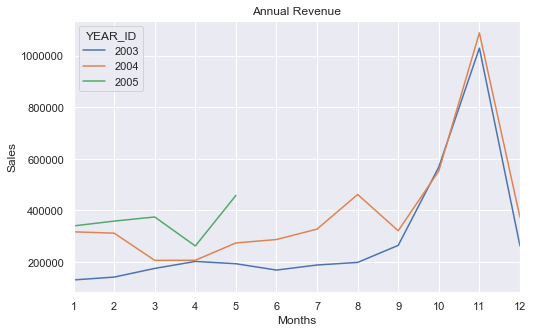

In [70]:
Sales.plot(figsize=(8,5))

months = range(1,13)
plt.xticks(months)

plt.ylabel('Sales')
plt.xlabel('Months')
plt.title("Annual Revenue")


In [71]:
#Monthly Revenue Growth Rate

monthly_growth = Sales.pct_change()
monthly_growth

YEAR_ID,2003,2004,2005
MONTH_ID,,,
1,NaN,NaN,NaN
2,0.085413,-0.016293,0.054905
3,0.239063,-0.339368,0.044883
4,0.155323,0.002014,-0.300937
5,-0.044325,0.326417,0.750011
6,-0.127628,0.048405,0.000000
7,0.116903,0.141170,0.000000
8,0.053680,0.410697,0.000000
9,0.334484,-0.304984,0.000000


Text(0.5, 1.0, ' Monthly Sales Growth Rate')

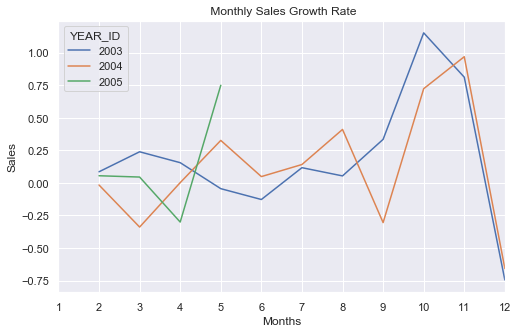

In [72]:
monthly_growth = monthly_growth[monthly_growth != 0]
monthly_growth.plot(figsize=(8,5))

months = range(1,13)
plt.xticks(months)

plt.ylabel('Sales')
plt.xlabel('Months')
plt.title(" Monthly Sales Growth Rate")

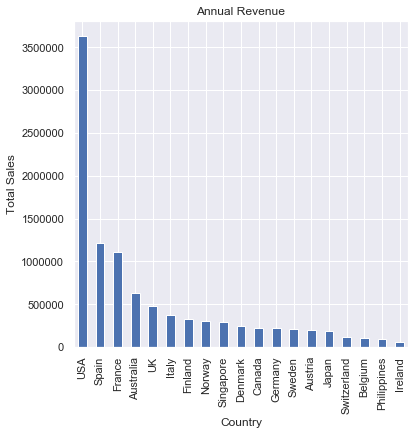

In [73]:
#Top 10 countries by Sales

fig= plt.figure(figsize=(6,6))

df.groupby(['COUNTRY']).sum()['SALES'].sort_values(ascending=False).plot.bar()
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.title("Annual Revenue")
plt.show()

## Part 4: Segmentation with RFM Method

In [78]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,NYC,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,Reims,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,Paris,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,Pasadena,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,San Francisco,USA,NaN,Brown,Julie,Medium


RFM (Recency, Frequency, Monetary) analysis is a proven marketing model for behavior based customer segmentation. It groups customers based on their transaction history – how recently, how often and how much did they buy.

RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

We consider we are analyzing the next day of latest order date in the data set. Creating a variable 'snapshot date' which is the latest date in data set.

Recency : Recency is the number of days between the customer's latest order date and the snapshot date
Frequency: Number of purchases made by the customer
MonetaryValue: Revenue generated by the customer

In [87]:
# Calculate Recency, Frequency and Monetary value for each customer

snapshot_date = df['ORDERDATE'].max() + dt.timedelta(days=1) #latest date in the data set

df_RFM = df.groupby(['CUSTOMERNAME']).agg({
    'ORDERDATE': lambda x: (snapshot_date - x.max()).days,
    'ORDERNUMBER': 'count',
    'SALES':'sum'})

#Renaming the columns

df_RFM.rename(columns={'ORDERDATE': 'Recency',
                   'ORDERNUMBER': 'Frequency',
                   'SALES': 'MonetaryValue'}, inplace=True)

df_RFM.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [ ]:
# Dividing into segments

The R, F and M values are divived into quartile segments. Each quartile is associated with one value.
M and F values are associated with a number from 1 to 4 included in ascending order of the quartile.
R values are associated with a number from 1 to 4 included in descending order of the quartile.

In [206]:
# Create a spend quartile with 4 groups - a range between 1 and 5
MonetaryValue_quartile = pd.qcut(df_RFM['MonetaryValue'], q=4, labels=range(1,5))
Recency_quartile = pd.qcut(df_RFM['Recency'], q=4, labels=list(range(4, 0, -1)))
Frequency_quartile = pd.qcut(df_RFM['Frequency'], q=4, labels=range(1,5))


# Assign the quartile values to the Spend_Quartile column in data
df_RFM['R'] = Recency_quartile
df_RFM['F'] = Frequency_quartile
df_RFM['M'] = MonetaryValue_quartile

#df_RFM[['MonetaryValue_Quartile','Recency_quartile','Frequency_quartile']] = [MonetaryValue_quartile,Recency_quartile,Frequency_quartile]

# Print data with sorted Spend values
#print(df_RFM.sort_values('MonetaryValue'))

df_RFM.head(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10.0,High Value Customer
Alpha Cognac,65,20,70488.44,4,2,2,8.0,Mid Value Customer
Amica Models & Co.,265,26,94117.26,1,2,3,6.0,Mid Value Customer
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11.0,High Value Customer
Atelier graphique,188,7,24179.96,2,1,1,4.0,Low Value Customer
"Australian Collectables, Ltd",23,23,64591.46,4,2,1,7.0,Mid Value Customer
"Australian Collectors, Co.",184,55,200995.41,3,4,4,11.0,High Value Customer
"Australian Gift Network, Co",119,15,59469.12,3,1,1,5.0,Low Value Customer
Auto Assoc. & Cie.,233,18,64834.32,1,1,1,3.0,Low Value Customer


In [91]:
#Calculating RFM Score

df_RFM['RFM_Score'] = df_RFM[['R','F','M']].sum(axis=1)
df_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10.0
Alpha Cognac,65,20,70488.44,4,2,2,8.0
Amica Models & Co.,265,26,94117.26,1,2,3,6.0
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11.0
Atelier graphique,188,7,24179.96,2,1,1,4.0


In [ ]:
#labelling the RFM_Score

* RFM Score > 10 - High Value Customer
* RFM SCore < 10 and RFM Score >= 6 - Mid Value Customer
* RFM Score < 6 - Low Value Customer

In [101]:
#Naming Levels
# Define rfm_level function
def rfm_level(df):
    if np.bool(df['RFM_Score'] >= 10):
        return 'High Value Customer'
    elif np.bool((df['RFM_Score'] < 10) & (df['RFM_Score'] >= 6)):
        return 'Mid Value Customer'
    else:
        return 'Low Value Customer'
    
# Create a new variable RFM_Level
df_RFM['RFM_Level'] = df_RFM.apply(rfm_level, axis=1)

# Print the header with top 5 rows to the console
df_RFM.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,RFM_Level
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",196,51,157807.81,2,4,4,10.0,High Value Customer
Alpha Cognac,65,20,70488.44,4,2,2,8.0,Mid Value Customer
Amica Models & Co.,265,26,94117.26,1,2,3,6.0,Mid Value Customer
"Anna's Decorations, Ltd",84,46,153996.13,3,4,4,11.0,High Value Customer
Atelier graphique,188,7,24179.96,2,1,1,4.0,Low Value Customer


Text(0.5, 1.0, 'RFM Level Distribution')

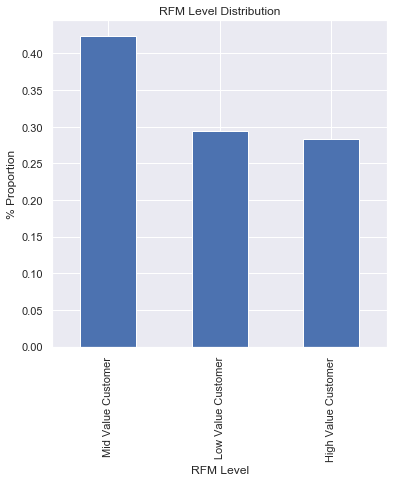

In [103]:
fig= plt.figure(figsize=(6,6))
df_RFM['RFM_Level'].value_counts(normalize=True).plot.bar() 
plt.ylabel('% Proportion')
plt.xlabel('RFM Level')
plt.title("RFM Level Distribution")

In [118]:
#Analyzing customer segments

# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = df_RFM.groupby(['RFM_Level']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue':['mean','count']}).round(1)

# Print the aggregated dataset
print(rfm_level_agg)

                    Recency Frequency MonetaryValue      
                       mean      mean          mean count
RFM_Level                                                
High Value Customer    85.0      54.3      193532.1    26
Low Value Customer    293.8      15.0       52414.6    27
Mid Value Customer    171.2      25.8       91938.5    39


## Part 4: Segmentation with K-Means Clustering

K Means Assumptions

* All variables have symmetrical (Normal) Distribution
* All Variables have same average value(approx)
* All Variables have same variance(approx)

In [128]:
#Check the distribution of the variables

data = df_RFM[['Recency','Frequency','MonetaryValue']]
data.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


Text(0.5, 1.0, 'MonetaryValue Distribution')

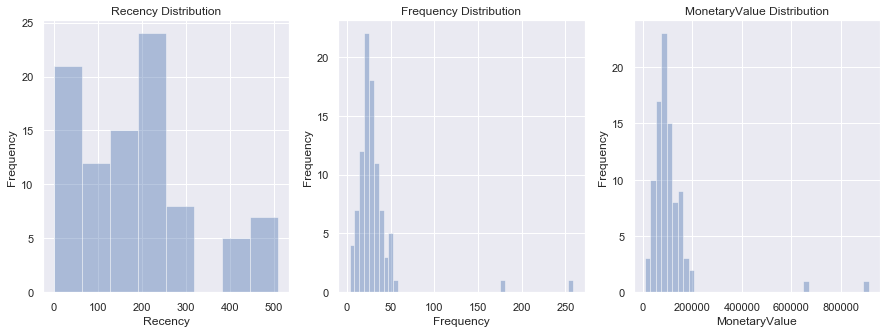

In [165]:

plt.subplot(1, 3, 1)

sns.distplot(df_RFM['Recency'], kde=False);
sns.set(rc={'figure.figsize':(15,5)})
plt.ylabel('Frequency')
plt.title("Recency Distribution")

plt.subplot(1, 3, 2)

sns.distplot(df_RFM['Frequency'], kde=False);
sns.set(rc={'figure.figsize':(15,2)})
plt.ylabel('Frequency')
plt.title("Frequency Distribution")

plt.subplot(1, 3, 3)

sns.distplot(df_RFM['MonetaryValue'], kde=False);
sns.set(rc={'figure.figsize':(5,2)})
plt.ylabel('Frequency')
plt.title("MonetaryValue Distribution")

In [166]:
#Removing the skewness by performing log transformation on the variables

data_log = np.log(data)
data_log.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",5.278115,3.931826,11.969133
Alpha Cognac,4.174387,2.995732,11.163204
Amica Models & Co.,5.579730,3.258097,11.452297
"Anna's Decorations, Ltd",4.430817,3.828641,11.944683
Atelier graphique,5.236442,1.945910,10.093279


Text(0.5, 1.0, 'Sales Distribution')

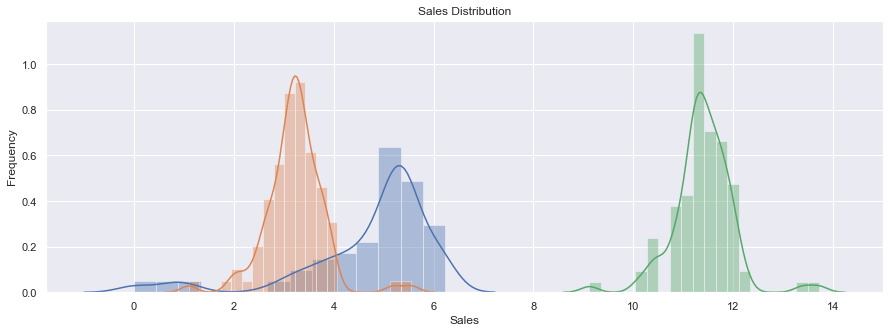

In [188]:
#Distribution of Recency, Frequency and MonetaryValue after Log Transformation

sns.distplot(data_log['Recency'], kde=True)
sns.distplot(data_log['Frequency'], kde=True)
sns.distplot(data_log['MonetaryValue'], kde=True);
sns.set(rc={'figure.figsize':(15,10)})
plt.ylabel('Frequency')
plt.xlabel('Sales')
plt.title("Sales Distribution")

In [190]:
#Standardizing the variables using StandardScaler() for equal variance and mean

#StandardSccaler
from sklearn.preprocessing import StandardScaler

#KMeans
from sklearn.cluster import KMeans

#file directoryy
import os

# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(data_log)

# Scale and center the data
data_normalized = scaler.transform(data_log)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data_log.index, columns=data_log.columns)

# Print summary statistics
data_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,92.00,92.00,92.00
mean,0.00,-0.00,0.00
std,1.01,1.01,1.01
min,-3.51,-3.67,-3.82
25%,-0.24,-0.41,-0.39
50%,0.37,0.06,-0.04
75%,0.53,0.45,0.52
max,1.12,4.03,3.92


Choosing number of Clusters using Elbow Method

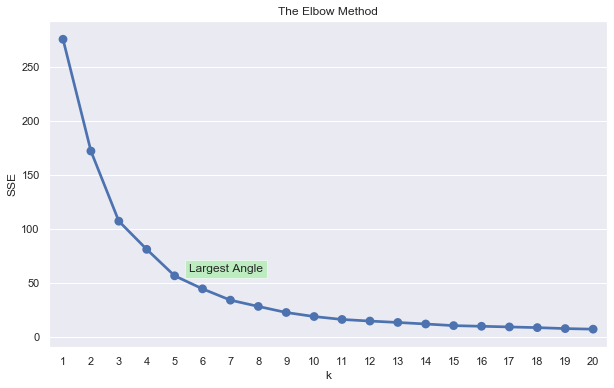

In [193]:
# Fit KMeans and calculate SSE for each k
sum_of_squared_error={}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sum_of_squared_error[k] = kmeans.inertia_ 

    
plt.figure(figsize=(10,6))
# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sum_of_squared_error.keys()), y=list(sse.values()))
plt.text(4.5,60,"Largest Angle",bbox=dict(facecolor='lightgreen', alpha=0.5))
plt.show()

Running KMeans with 5 clusters

In [194]:
# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(data_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Assigning Cluster Labels to Raw Data
# Create a DataFrame by adding a new cluster label column
data_rfm = data.assign(Cluster=cluster_labels)
data_rfm.head()

,Recency,Frequency,MonetaryValue,Cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",196,51,157807.81,3
Alpha Cognac,65,20,70488.44,0
Amica Models & Co.,265,26,94117.26,0
"Anna's Decorations, Ltd",84,46,153996.13,3
Atelier graphique,188,7,24179.96,2


In [199]:
# Group the data by cluster
grouped = data_rfm.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         209.2      22.1       78633.2    43
1           2.0      38.8      132201.6     4
2         324.2      10.7       35628.7    12
3         126.5      37.1      133158.0    31
4           2.0     219.5      783576.1     2